In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [31]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size

    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.plot(X[plt_labels == -1, 0], X[plt_labels == -1, 1], linestyle = 'None', markerfacecolor = 'black', marker = 'o')
        plt.plot(X[mask, 0], X[mask, 1], linestyle = 'None', markerfacecolor=color, marker='o')

    plt.show()

DATA:


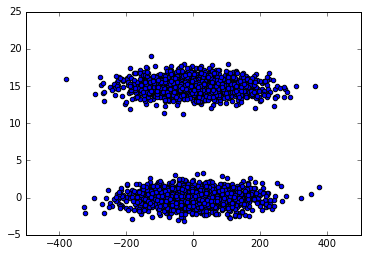

KMEANS:


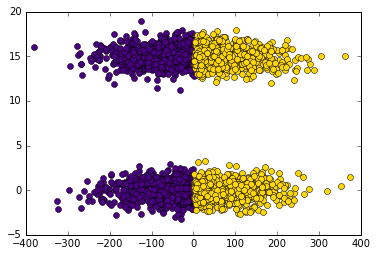

BIRCH


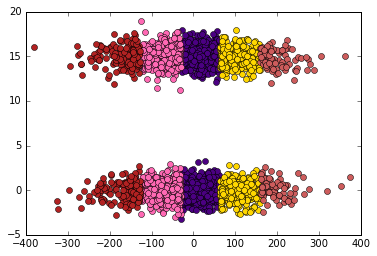

DBSCAN


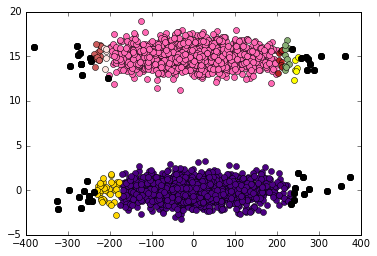

In [55]:
def normalize(X):
    return (X - np.min(X,axis = 0))/(np.max(X,axis = 0) - np.min(X,axis = 0))
def standarize(X):
    return (X - np.mean(X,axis = 0))/np.sqrt(np.mean((np.mean(X,axis = 0) - X)**2,axis = 0))

n = 3000
x = 100*np.random.normal(size = n)
y = np.concatenate([np.random.normal(size = n/2),np.random.normal(size = n/2)+15])
X = np.array([x,y]).T
print "DATA:"
plt.scatter(X[:,0],X[:,1])
plt.show()

k_means = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means.fit(X)
print "KMEANS:"
plotClustering(X, k_means.labels_)

birch = Birch(threshold=50, n_clusters=None)
birch.fit(X)
print "BIRCH"
plotClustering(X, birch.labels_)

dbscan = DBSCAN(eps=5)
dbscan.fit(X)
print "DBSCAN"
plotClustering(X, dbscan.labels_)

KMEANS:


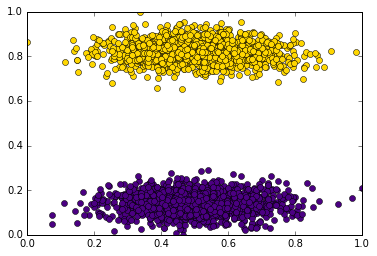

BIRCH


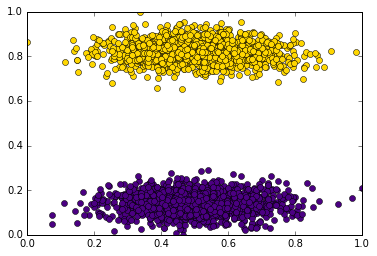

DBSCAN


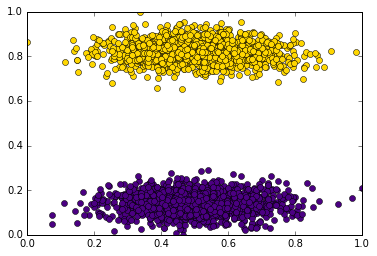

In [59]:
Y = normalize(np.copy(X))
k_means = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means.fit(Y)
print "KMEANS:"
plotClustering(Y, k_means.labels_)

birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(Y)
print "BIRCH"
plotClustering(Y, birch.labels_)

dbscan = DBSCAN(eps=0.25)
dbscan.fit(Y)
print "DBSCAN"
plotClustering(Y, dbscan.labels_)

KMEANS:


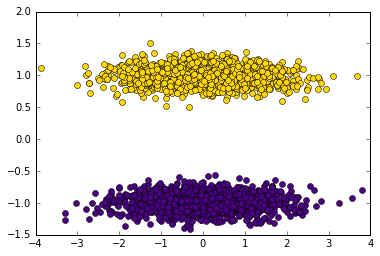

BIRCH


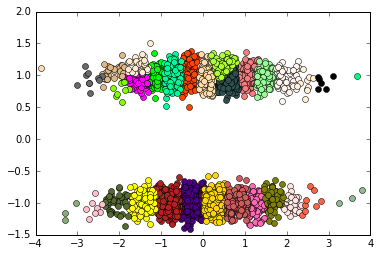

DBSCAN


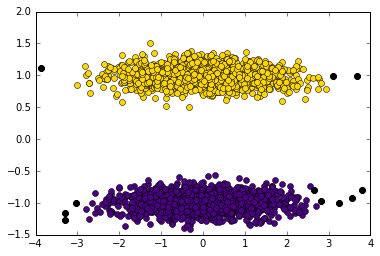

In [60]:
Y = standarize(np.copy(X))
k_means = KMeans(init='k-means++', n_clusters=2, n_init=2)
k_means.fit(Y)
print "KMEANS:"
plotClustering(Y, k_means.labels_)

birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(Y)
print "BIRCH"
plotClustering(Y, birch.labels_)

dbscan = DBSCAN(eps=0.25)
dbscan.fit(Y)
print "DBSCAN"
plotClustering(Y, dbscan.labels_)